In [48]:
import numpy   #to_process_matrix_values
import matplotlib.pyplot #to_show_images
from keras.layers import Dense, Flatten #"fully connected" layers (Dense)
from keras.models import Sequential #последовательная_модель
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import optimizers 
from keras import losses
from keras import metrics


In [29]:
#load mnist data
(x_training,y_training),(x_testing,y_testing) = mnist.load_data()

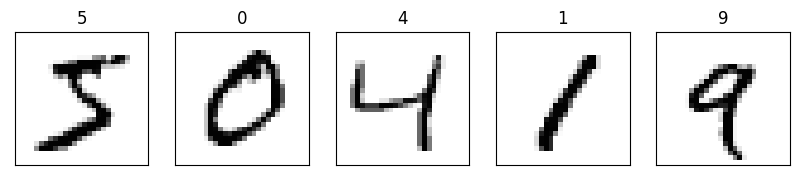

In [30]:
#show first 5 images from dataset
fig,axes=matplotlib.pyplot.subplots(ncols=5,sharex=False,sharey=True,figsize=(10,4))
for i in range(5):
    axes[i].set_title(y_training[i])
    axes[i].imshow(x_training[i],cmap='Greys')
    axes[i].get_xaxis().set_visible(False) 
    axes[i].get_yaxis().set_visible(False)
matplotlib.pyplot.show()

In [31]:
# Преобразование данных в матрицах изображений
x_training = x_training/x_training.max()
x_testing = x_testing/x_testing.max()
# Преобразуем целевые значения методом «one-hot encoding»
y_train = to_categorical(y_training, 10)
y_test = to_categorical(y_testing, 10)

In [32]:

# Создаем модель
model = Sequential([
    Dense(32, activation='relu', input_shape=(x_training[0].shape)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Flatten(),
    Dense(10, activation='sigmoid')
]) 
# Выведем полученную модель 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 28, 32)            928       
                                                                 
 dense_15 (Dense)            (None, 28, 64)            2112      
                                                                 
 dense_16 (Dense)            (None, 28, 128)           8320      
                                                                 
 dense_17 (Dense)            (None, 28, 256)           33024     
                                                                 
 dense_18 (Dense)            (None, 28, 512)           131584    
                                                                 
 flatten_2 (Flatten)         (None, 14336)             0         
                                                                 
 dense_19 (Dense)            (None, 10)               

In [49]:
# Укажем конфигурацию обучения (оптимизатор, функция потерь, метрики)
model.compile(optimizer=optimizers.RMSprop(),  # Optimizer
              # Минимизируемая функцию потерь
              loss=losses.SparseCategoricalCrossentropy(),
              # Список метрик для мониторинга
              metrics=[metrics.SparseCategoricalAccuracy()])

In [51]:
# Обучим модель разбив данные на "пакеты", итерируя весь датасет заданное количество "эпох"
## 10,000 примеров для валидации
x_val = x_training[-10000:]
y_val = y_training[-10000:]
history = model.fit(x_training, y_training,
                    batch_size=64,
                    epochs=3,
                    validation_data=(x_val, y_val))

Epoch 1/3
938/938 [==============================] - 68s 71ms/step - loss: 0.2341 - sparse_categorical_accuracy: 0.9284 - val_loss: 0.1398 - val_sparse_categorical_accuracy: 0.9610
Epoch 2/3
938/938 [==============================] - 63s 67ms/step - loss: 0.1343 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.1016 - val_sparse_categorical_accuracy: 0.9719
Epoch 3/3
938/938 [==============================] - 61s 65ms/step - loss: 0.1157 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.0935 - val_sparse_categorical_accuracy: 0.9750


In [52]:
# Возвращаемый объект "history" содержит записи значений потерь и метрик во время обучения
print('nhistory dict:', history.history)

nhistory dict: {'loss': [0.2340920865535736, 0.13429787755012512, 0.11571616679430008], 'sparse_categorical_accuracy': [0.9283666610717773, 0.9605833292007446, 0.9664166569709778], 'val_loss': [0.13980470597743988, 0.1015796959400177, 0.09353815764188766], 'val_sparse_categorical_accuracy': [0.9610000252723694, 0.9718999862670898, 0.9750000238418579]}


In [54]:
# Оценим модель на тестовых данных, используя "evaluate"
print('Оцениваем на тестовых данных')
results = model.evaluate(x_testing, y_testing, batch_size=128)
print('test loss, test acc:', results)

Оцениваем на тестовых данных
79/79 [==============================] - 4s 48ms/step - loss: 0.1288 - sparse_categorical_accuracy: 0.9645
test loss, test acc: [0.12879157066345215, 0.9645000100135803]


In [106]:
# Сгенерируем прогнозы (вероятности - выходные данные последнего слоя)  на новых данных с помощью "predict" 
predictions = model.predict(x_testing[:100])
print(predictions[60])


4/4 [==============================] - 0s 12ms/step
[1.02509016e-22 1.31665702e-13 3.96383953e-10 1.18826945e-04
 1.96397355e-13 3.76208487e-09 5.40333859e-27 1.72162466e-02
 1.34852848e-17 4.30093738e-09]
